<a href="https://colab.research.google.com/github/cgoeser1/MSDS422_course_assignments/blob/main/Titanic(2021OCT17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival**

# **Conduct EDA on the dataset as follows:**
* Conduct your analysis using a cross-validation design.
* Build at least three models to classify survivors.
  -  A logistic regression model
  - An LDA or QDA model
  - A KNN model
* Evaluate each of the models’ assumptions.
* Evaluate goodness of fit metrics including TPR, FPR, precision, recall, and accuracy.
* Build ROC and Precision / Recall graphs.
* Submit your models’ predictions to Kaggle.com for evaluation on the test set and provide your Kaggle.com user name and a screen snapshot of your scores.
* Discuss what your models tell you in layman’s terms.

* Chad can see this 10-13-2021
* Anty can see this 10/13/2021

Import all relevant packages.

In [834]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
from scipy import stats

# to make this notebook's output stable across runs
np.random.seed(31)


# To plot pretty figures
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Clone the repository, so all files are in the same folder.  Should be accessible to all collaborators.

In [835]:
!git clone https://github.com/cgoeser1/MSDS422_course_assignments


fatal: destination path 'MSDS422_course_assignments' already exists and is not an empty directory.


Change the Colab working directory to that just cloned from GitHub.
Confirm the working directory.

In [836]:
os.chdir('/content/MSDS422_course_assignments')
os.getcwd()

'/content/MSDS422_course_assignments'


Load train and test files into Pandas dataframes.

In [837]:
## Get data from the provided CSV files.
train_url = 'https://gitcdn.link/repo/cgoeser1/MSDS422_course_assignments/main/train_titanic.csv'
train = pd.read_csv(train_url)
test_url = 'https://gitcdn.link/repo/cgoeser1/MSDS422_course_assignments/main/test_titanic.csv'
test = pd.read_csv(test_url)

In [838]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [839]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [840]:
#Check the number of observations for each feature in the 'train' set.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [841]:
train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

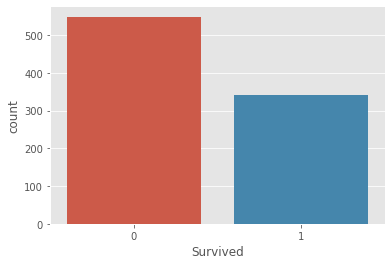

In [842]:
sns.countplot(x='Survived', data=train);

In [843]:
## quick look at percentage of male and females who survived:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(f"% of women who survived: {rate_women*100:.2f}")
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(f"% of men who survived: {rate_men*100:.2f}")
rate_all = sum(train["Survived"])/len(train["Survived"]) 
print(f"% of all who survived: {rate_all*100:.2f}")

% of women who survived: 74.20
% of men who survived: 18.89
% of all who survived: 38.38


In [844]:
print(f"Women_Survival\tMen_Survival\tAll_Survival")
print(f"{rate_women*100:.2f}%\t\t{rate_men*100:.2f}%\t\t{rate_all*100:.2f}%")

Women_Survival	Men_Survival	All_Survival
74.20%		18.89%		38.38%


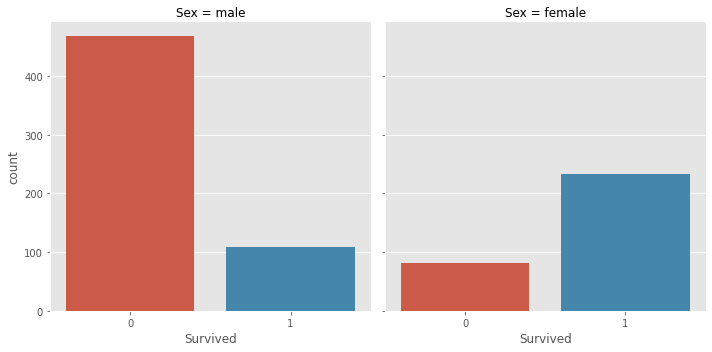

In [845]:
## look at the percentages visually
sns.catplot(x='Survived', col='Sex', kind='count', data=train);

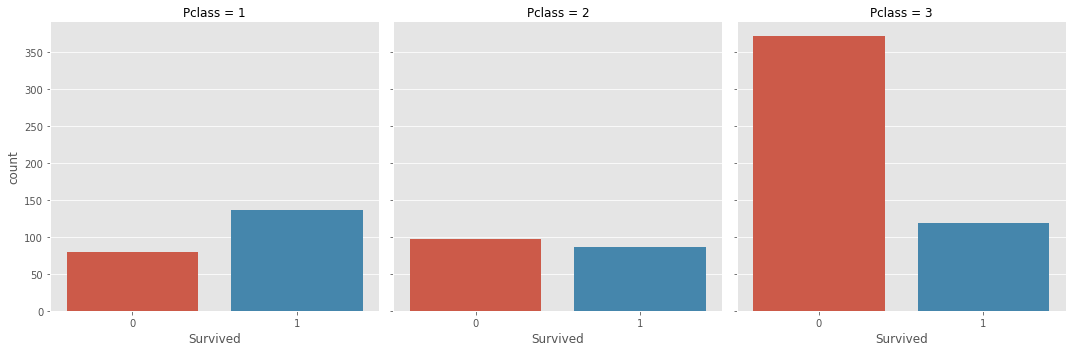

In [846]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=train);

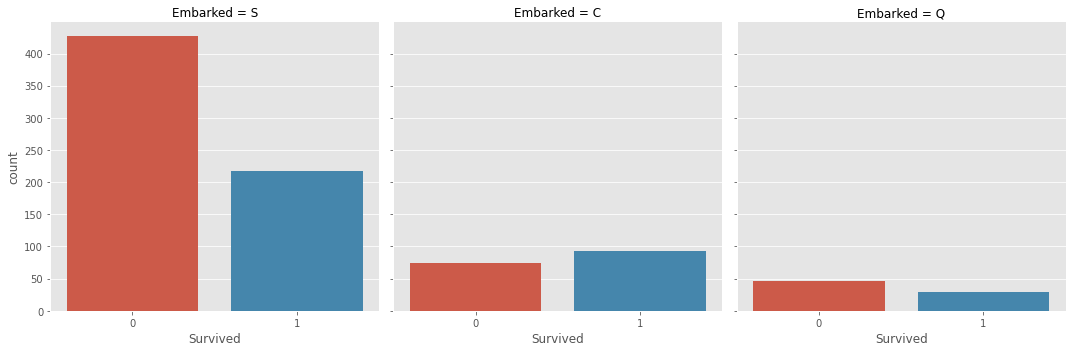

In [847]:
sns.catplot(x='Survived', col='Embarked', kind='count', data=train);

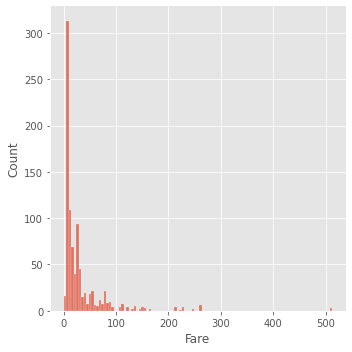

In [848]:
sns.displot(train.Fare, kde=False);

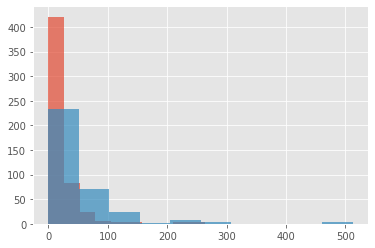

In [849]:
train.groupby('Survived').Fare.hist(alpha=0.7);

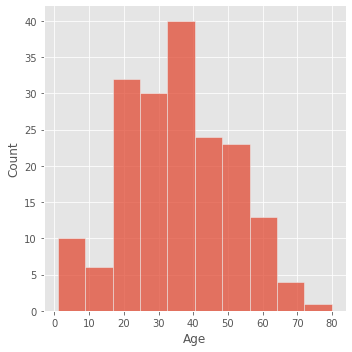

In [850]:
train_drop = train.dropna()
sns.displot(train_drop.Age, kde=False);

In [851]:
train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


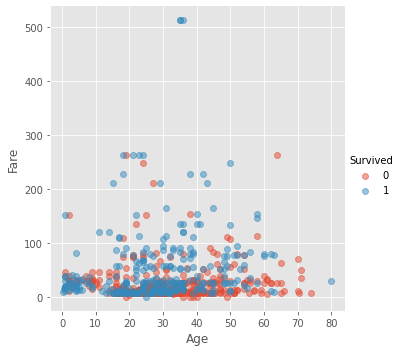

In [852]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=train, fit_reg=False, scatter_kws={'alpha':0.5});

In [853]:
## sns.pairplot(train_drop, hue='Survived');

In [854]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

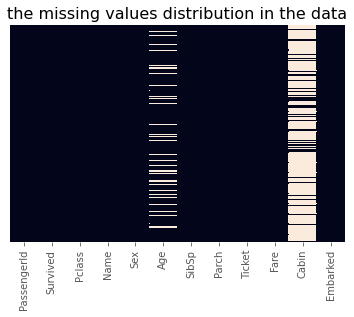

In [855]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

plt.title('the missing values distribution in the data',fontsize=16)
plt.show()

In [856]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [857]:
## Impute missing numerical values
train['Age'] = train['Age'].fillna(train.Age.median())
## Impute Fare
train['Fare'] = train.Fare.fillna(train.Fare.median())
## Impute Embarked
train.Embarked.fillna(train.Embarked.mode()[0], inplace = True)

# Impute Cabin
train['Cabin'] = train.Cabin.astype('str')
train['Cabin'] = train['Cabin'].fillna('no_cabin')
train['Cab-X'] = train.Cabin.str[0]
train = train.drop('Cabin',1)

# Check out info of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Cab-X        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [858]:
## Impute missing numerical values
test['Age'] = test['Age'].fillna(test.Age.median())
## Impute Fare
test['Fare'] = test.Fare.fillna(test.Fare.median())
## Impute Embarked
test.Embarked.fillna(test.Embarked.mode()[0], inplace = True)

# Impute Cabin
test['Cabin'] = test.Cabin.astype('str')
test['Cabin'] = test['Cabin'].fillna('no_cabin')
test['Cab-X'] = test.Cabin.str[0]
test = test.drop('Cabin',1)

# Check out info of data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
 10  Cab-X        418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [859]:
from collections import Counter
print(Counter(train['Embarked']))
print(Counter(test['Embarked']))

Counter({'S': 646, 'C': 168, 'Q': 77})
Counter({'S': 270, 'C': 102, 'Q': 46})


In [860]:
# Create column of number of Family members onboard
train['FamSize'] = train.Parch + train.SibSp
train = train.drop(['SibSp','Parch'], axis=1)
train.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Cab-X        891 non-null    object 
 10  FamSize      891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [861]:
# Create column of number of Family members onboard
test['FamSize'] = test.Parch + test.SibSp
test = test.drop(['SibSp','Parch'], axis=1)
test.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   Cab-X        418 non-null    object 
 9   FamSize      418 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [862]:
train_needed = train.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)
train_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Cab-X     891 non-null    object 
 7   FamSize   891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


There are only 680 unique ticket numbers.  This implies that family members were boarding under the same ticket number?  Also, there are only 240 cabins listed.  Did the remaining reside in some communal spaces?

In [863]:
len(train.Name.unique())

891

In [864]:
train_needed_dummies = pd.get_dummies(train_needed, drop_first= True)
train_needed_dummies.drop("Cab-X_T", axis=1, inplace=True)
train_needed_dummies.head()

,Survived,Pclass,Age,Fare,FamSize,Sex_male,Embarked_Q,Embarked_S,Cab-X_B,Cab-X_C,Cab-X_D,Cab-X_E,Cab-X_F,Cab-X_G,Cab-X_n
0,0,3,22.0,7.2500,1,1,0,1,0,0,0,0,0,0,1
1,1,1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,0,1,0,0,0,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1,0,1,0,0,0,0,0
4,0,3,35.0,8.0500,0,1,0,1,0,0,0,0,0,0,1


In [917]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [919]:
train_needed_dummies.drop("Survived",axis=1,inplace=True)
m=sm.add_constant(train_needed_dummies)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.432523
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      876
Method:                           MLE   Df Model:                           14
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.3505
Time:                        01:32:14   Log-Likelihood:                -385.38
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 5.648e-80
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1404      0.748      6.873      0.000       3.675       6.606
Pclass        -0.8830      0.179     -4.920      0.000      -1.235      -0.531
Age           -0.0408      0.008     -5.045      0.000      -0.057      -0.025
Fare           0.0025      0.003      0.955      0.340      -0.003       0.008
FamSize       -0.2268      0.069     -3.305      0.001      -0.361      -0.092
Sex_male      -2.7851      0.204    -13.631      0.000      -3.186      -2.385
Embarked_Q    -0.1446      0.385     -0.375      0.708      -0.900       0.611
Embarked_S    -0.4533      0.242     -1.870      0.062      -0.928       0.022
Cab-X_B        0.1674      0.700      0.239      0.811      -1.205       1.540
Cab-X_C       -0.3981      0.647     -0.615      0.538      -1.666       0.870
Cab-X_D        0.6649      0.723      0.920      0.358      -0.752       2.082
Cab-X_E        1.1387      0.723      1.576      0.115      -0.278       2.555
Cab-X_F        0.9181      0.918      1.000      0.317      -0.882       2.718
Cab-X_G       -1.0729      1.232     -0.871      0.384      -3.487       1.341
Cab-X_n       -0.4230      0.609     -0.694      0.487      -1.617       0.771
==============================================================================
"""

# Since the variables with p value > 0.005 are not statistically significant we will drop them one by one

In [923]:
train_needed_dummies.columns

Index(['Pclass', 'Age', 'Fare', 'FamSize', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Cab-X_B', 'Cab-X_C', 'Cab-X_D', 'Cab-X_E', 'Cab-X_F',
       'Cab-X_G', 'Cab-X_n'],
      dtype='object')

In [924]:
# Drop Deck since its P value > 0.005
train_needed_dummies = train_needed_dummies.drop(['Cab-X_B', 'Cab-X_C', 'Cab-X_D', 'Cab-X_E', 'Cab-X_F', 'Cab-X_G', 'Cab-X_n'], axis= 1)

In [926]:
m=sm.add_constant(train_needed_dummies)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.441768
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.3366
Time:                        01:37:55   Log-Likelihood:                -393.62
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.170e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2330      0.562      9.308      0.000       4.131       6.335
Pclass        -1.0931      0.143     -7.625      0.000      -1.374      -0.812
Age           -0.0384      0.008     -4.919      0.000      -0.054      -0.023
Fare           0.0021      0.002      0.900      0.368      -0.003       0.007
FamSize       -0.2203      0.068     -3.244      0.001      -0.353      -0.087
Sex_male      -2.7475      0.200    -13.771      0.000      -3.139      -2.356
Embarked_Q    -0.0929      0.380     -0.244      0.807      -0.838       0.653
Embarked_S    -0.4208      0.236     -1.781      0.075      -0.884       0.042
==============================================================================
"""

In [927]:
# Drop Deck since its P value > 0.005
train_needed_dummies = train_needed_dummies.drop(['Fare', 'Embarked_Q', 'Embarked_S',], axis= 1)

In [928]:
m=sm.add_constant(train_needed_dummies)
model=sm.Logit(y_train,m)
result=model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.444911
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.3319
Time:                        01:39:09   Log-Likelihood:                -396.42
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.007e-84
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2099      0.481     10.842      0.000       4.268       6.152
Pclass        -1.1751      0.120     -9.801      0.000      -1.410      -0.940
Age           -0.0391      0.008     -5.039      0.000      -0.054      -0.024
FamSize       -0.2155      0.064     -3.358      0.001      -0.341      -0.090
Sex_male      -2.7834      0.198    -14.081      0.000      -3.171      -2.396
==============================================================================
"""

In [930]:
x_train_final = train_needed_dummies
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       891 non-null    float64
 2   FamSize   891 non-null    int64  
 3   Sex_male  891 non-null    uint8  
dtypes: float64(1), int64(2), uint8(1)
memory usage: 21.9 KB


# **Creating the Logistic Regression Model**

In [931]:
y_train = train_needed['Survived']
len(y_train)

891

In [932]:
from sklearn.linear_model import LogisticRegression
logisReg = LogisticRegression()
logisReg.fit(x_train_final, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Cross Validation

In [933]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(logisReg, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log

array([0.79329609, 0.78089888, 0.79775281, 0.78089888, 0.80337079])

In [934]:
# the mean of the cross validation scores
m_scores = scores_log.mean()
m_scores

0.7912434875400163

The accuracy of cross-validation mean score is 0.798 or ~80%

# Confusion Matrix
To create the confusion matrix we need a set of predictions to compare with the actual outcome. We will use the function
cross_val_predict since we did not split the trai set. This function use the train data to do a k fold cross validation and returns the predictions. 

In [935]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(logisReg, x_train_final, y_train, cv=3)

In [936]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[469,  80],
       [108, 234]])

In [937]:
##From the matrix above we can see that :\
##TPR (recall) = 231/(231+109) = 0.679 \
##FPR = 78/(78+471) = 0.142

In [938]:
tpr = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(f"TPR (Recall) = {tpr}")

precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
print(f"Precision = {precision}")


TPR (Recall) = 0.6842105263157895
Precision = 0.7452229299363057


In [939]:
from sklearn.metrics import precision_score, recall_score
# Find the (TPR) Recall 
recall_score(y_train, y_train_pred) # == 231 / (231 + 109)

0.6842105263157895

In [940]:
# Find the precision
precision_score(y_train, y_train_pred) # ==  231/ (231 + 78)

0.7452229299363057

# Precision-Recall Graph

In [941]:
y_scores = cross_val_predict(logisReg, x_train_final, y_train, cv=3, method="decision_function")
y_scores[0:10]

array([-2.24288777,  2.39397212,  0.4442502 ,  2.4948136 , -2.48395574,
       -2.24865895, -0.57361882, -2.15834659,  0.01881279,  1.92620416])

In [942]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [943]:
print(precisions[0:2], recalls[0:2], thresholds[0:2])

[0.39767442 0.39697322] [1.         0.99707602] [-2.80851533 -2.78546696]


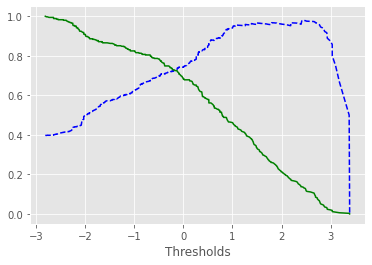

In [944]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Thresholds")


plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Text(0.5, 0, 'recall')

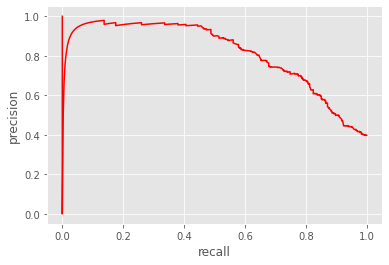

In [945]:
plt.plot(recalls, precisions, "r-")
plt.ylabel("precision")
plt.xlabel("recall")

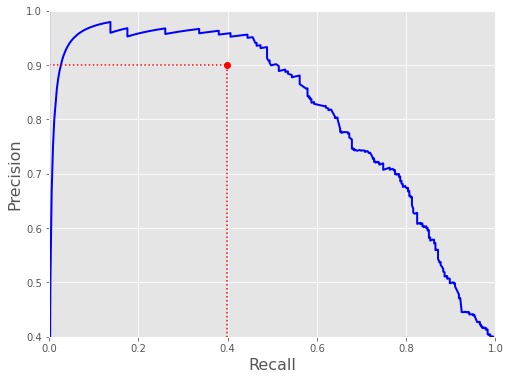

In [946]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0.0, 1, 0.4, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
#save_fig("precision_vs_recall_plot")
plt.show()

In [947]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

0.7803884712305935

In [948]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train, y_train_pred_90)

0.9015544041450777

In [949]:
recall_score(y_train, y_train_pred_90)

0.5087719298245614

# ROC Curve

In [950]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

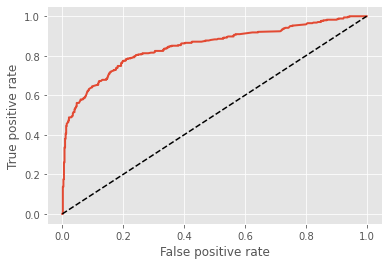

In [951]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [952]:
# area under thr ROC curve score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.8464406310250429

# Test Set prep


In [953]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Cab-X,FamSize
0,892,3,"Kelly, Mr. James",male,34.5,330911,7.8292,Q,n,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,S,n,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,Q,n,0
3,895,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,S,n,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,S,n,2


In [954]:
test_needed = test.drop(['Name', 'PassengerId', 'Ticket'], axis = 1)
test_needed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   Fare      418 non-null    float64
 4   Embarked  418 non-null    object 
 5   Cab-X     418 non-null    object 
 6   FamSize   418 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 23.0+ KB


In [965]:
test_needed_dummies = pd.get_dummies(test_needed, drop_first= True)

In [967]:
test_final_cols = x_train_final.columns.to_list()

In [968]:
test_final = test_needed_dummies[test_final_cols]
test_final.head() 

,Pclass,Age,FamSize,Sex_male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,2,0


# Get Predictions

In [970]:
logis_pred = logisReg.predict(test_final)
len(logis_pred)

418

In [971]:
# Create a data frame with the passengerid and prediction for submission.
ID = test['PassengerId']
logis_sub = pd.DataFrame(ID, columns=['PassengerId'])
logis_sub['Survived'] = logis_pred
logis_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [972]:
# Export dataframe with the passengerid and prediction for submission.
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"logis_predict_{date}.csv")
logis_sub.to_csv(filename, index=False)

# **KNN model**

In [973]:
from sklearn.neighbors import KNeighborsClassifier
knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(x_train_final,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [974]:
from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(knn_cls, x_train_final, y_train, scoring="accuracy", cv=5)
scores_knn

array([0.77653631, 0.78089888, 0.7752809 , 0.75280899, 0.79775281])

In [975]:
# the mean of the cross validation scores
mean_scores_knn = scores_knn.mean()
mean_scores_knn

0.776655577176574

## Confusion Matrix
To create the confusion matrix we need a set of predictions to compare with the actual outcome. We will use the function
cross_val_predict since we did not split the trai set. This function use the train data to do a k fold cross validation and returns the predictions. 

In [976]:
y_train_knnPred = cross_val_predict(knn_cls, x_train_final, y_train, cv=3)

In [977]:
confusion_matrix(y_train, y_train_knnPred)

array([[467,  82],
       [123, 219]])

In [978]:
# Find the Recall 
recall_score(y_train, y_train_knnPred) 

0.6403508771929824

In [979]:
# Find the precision
precision_score(y_train, y_train_knnPred)

0.7275747508305648

In [980]:
from sklearn.model_selection import cross_val_score
scores_log = cross_val_score(logisReg, x_train_final, y_train, scoring="accuracy", cv=5)
scores_log

array([0.79329609, 0.78089888, 0.79775281, 0.78089888, 0.80337079])

In [981]:
# the mean of the cross validation scores
m_scores = scores_log.mean()
m_scores

0.7912434875400163

In [982]:
knn_pred = knn_cls.predict(test_final)
len(knn_pred)

418

In [983]:
# Create a data frame with the passengerid and prediction for submission.
ID = test['PassengerId']
knn_sub = pd.DataFrame(ID, columns=['PassengerId'])
knn_sub['Survived'] = knn_pred
knn_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [984]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"knn_predict_{date}.csv")
knn_sub.to_csv(filename, index=False)

# **QDA (Quadratic Discriminant Analysis)**

In [985]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [986]:
qda = QuadraticDiscriminantAnalysis()
model2 = qda.fit(x_train_final, y_train)
print(model2.priors_)
print(model2.means_)

[0.61616162 0.38383838]
[[ 2.53187614 30.02823315  0.88342441  0.85245902]
 [ 1.9502924  28.29143275  0.93859649  0.31871345]]


In [987]:
qda_pred=model2.predict(test_final)


In [988]:
# Create a data frame with the passengerid and prediction for submission.
ID = test['PassengerId']
qda_pred = pd.DataFrame(ID, columns=['PassengerId'])
qda_pred['Survived'] = pred2
qda_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [989]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"qda_predict_{date}.csv")
qda_pred.to_csv(filename, index=False)

# **SVC (Support Vector Classification)**

In [990]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(x_train_final, y_train,)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [991]:
y_pred = svm_clf.predict(test_final)

In [992]:
ID = test['PassengerId']
# Create a dataframe for results to be submitted 
svc_results = pd.DataFrame(ID, columns= ['PassengerId'])
svc_results['Survived'] = Test_pred
svc_results.shape

(418, 2)

In [993]:
svc_results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [994]:
from datetime import datetime
date = str(datetime.now().strftime("%Y_%m_%d-%I.%M%p"))
filename=(f"svc_predict_{date}.csv")
svc_results.to_csv(filename, index=False)